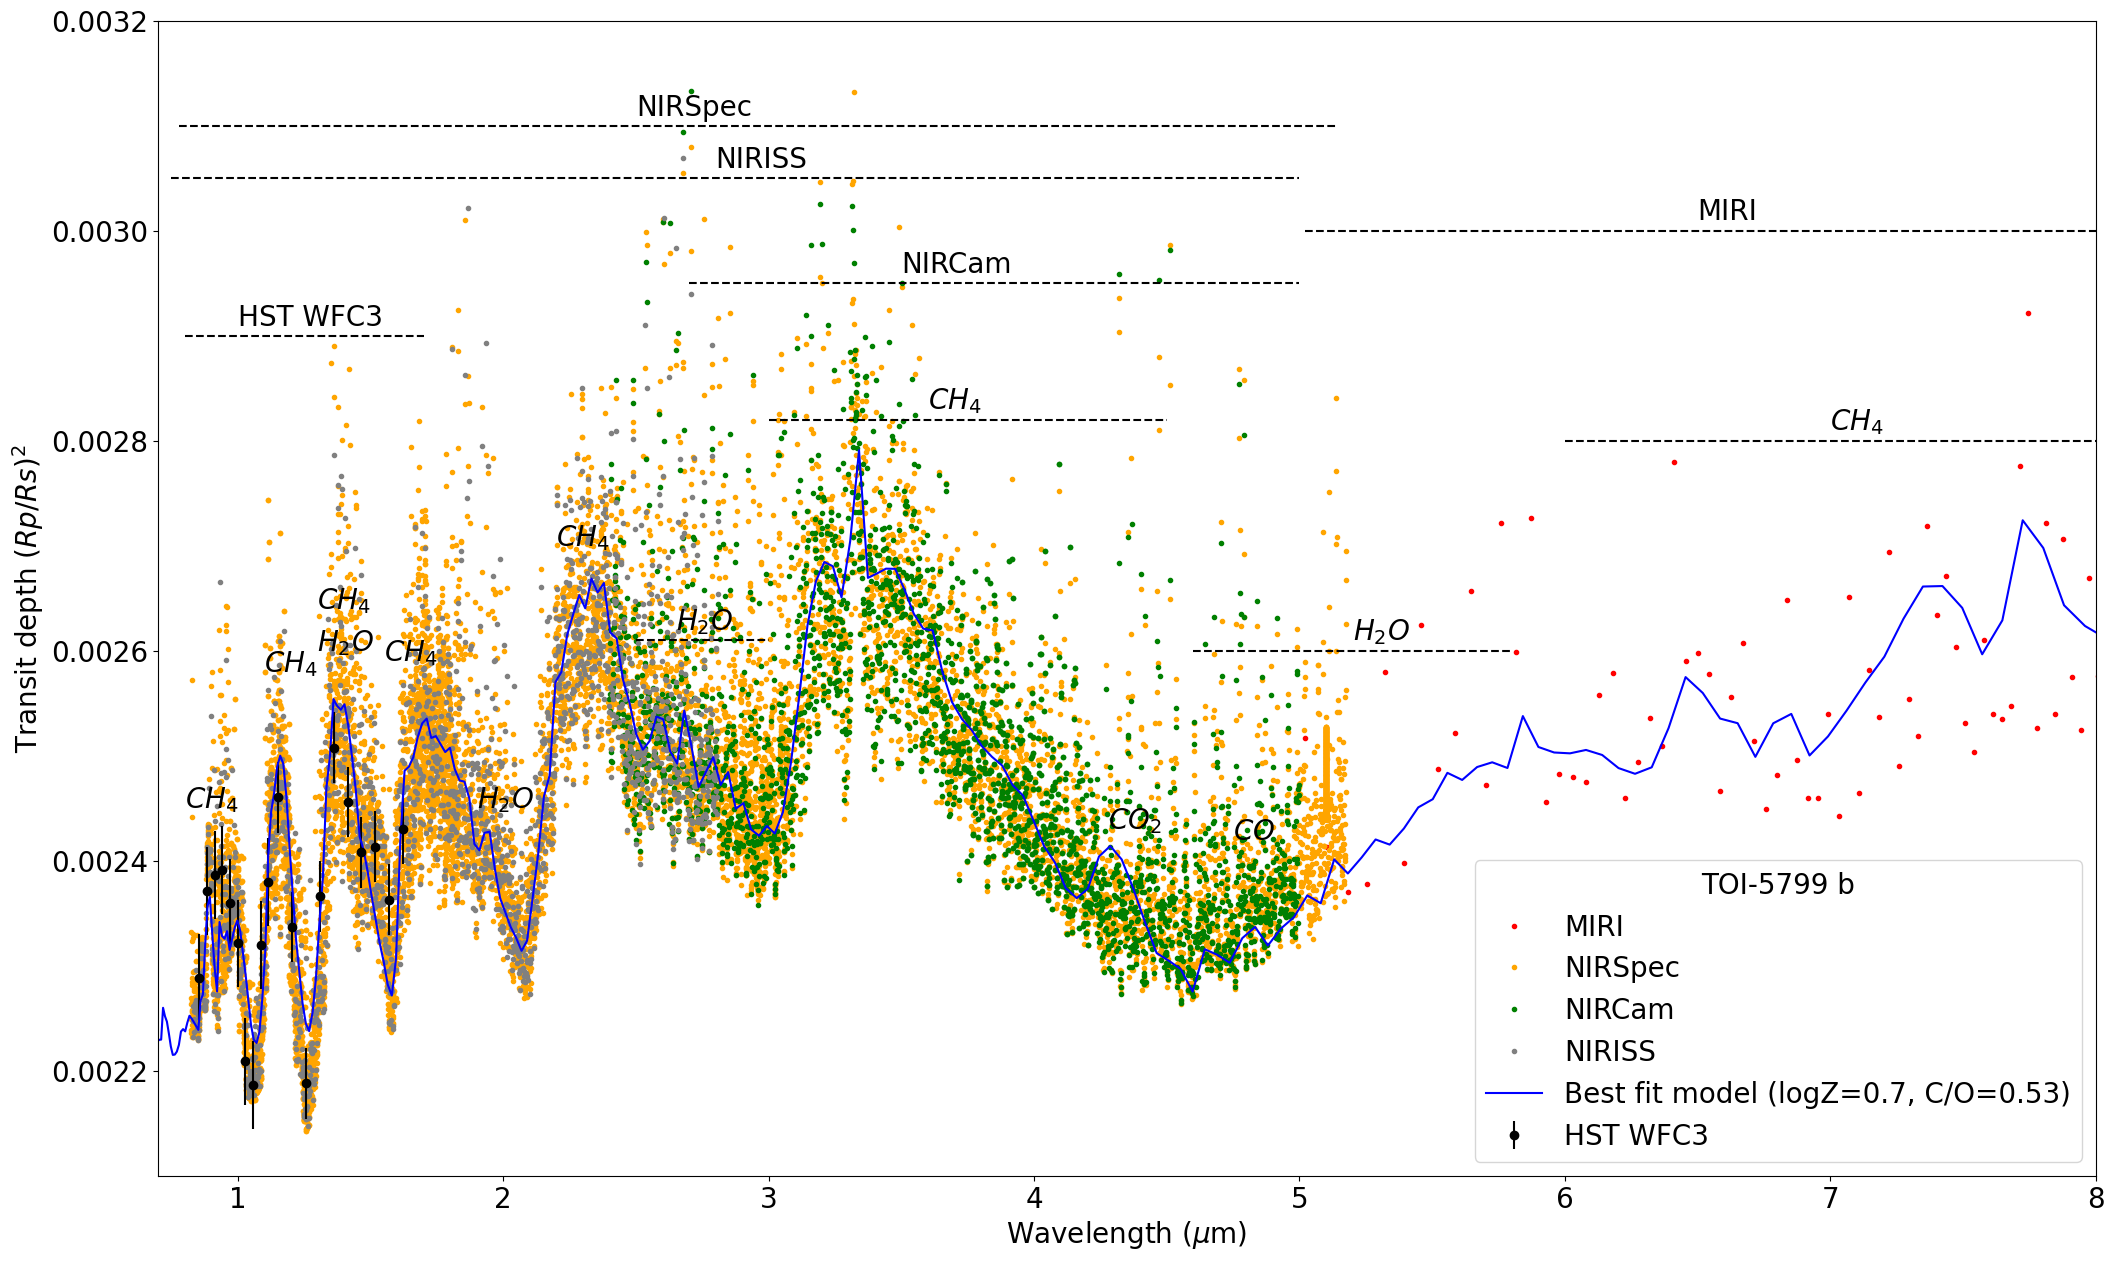

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from platon.transit_depth_calculator import TransitDepthCalculator
from platon.constants import M_jup, R_sun, R_jup
from platon.abundance_getter import AbundanceGetter
getter = AbundanceGetter()
# Solar logZ and C/O ratio. Modify as required.
abundances = getter.get(0.7, 0.53)

# Zero out CO.  (Note that if CO is a major component, you should probably
# renormalize the abundances of other species so that they add up to 1.)
plt.figure(figsize=(25,15))

#plt.axhspan(i, i+.2, facecolor='0.2', alpha=0.5)
#plt.axvspan(0.5, 5.0, facecolor='yellow', alpha=0.2,label="NIRISS $0.5-5.0 \u03BC$ m")
#plt.axvspan(0.7, 5.14, facecolor='yellow', alpha=0.2,label="NIRSpec $0.7-5.14 \u03BC$ m")
#plt.axvspan(2.7, 5.0, facecolor='yellow', alpha=0.2,label="NIRCam $2.7-5.0 \u03BC$ m")
#plt.axvspan(5.02, 10, facecolor='pink', alpha=0.2,label="MIRI $5.02-25.5 \u03BC$ m")



# All quantities in SI
Rs = 0.343358 * R_sun     #Radius of star
Mp = 0.01227016676274222083 * M_jup     #Mass of planet
Rp = 0.1518012942986706748 * R_jup      #Radius of planet
T = 552.500823547998            #Temperature of isothermal part of the atmosphere
#plt.figure(figsize=(15,9))

for i in range(0,2):
    if i==0:
        #create a TransitDepthCalculator object and compute wavelength dependent transit depths
        depth_calculator = TransitDepthCalculator(method="ktables") #put "xsec" for opacity sampling
        wavelengths, transit_depths = depth_calculator.compute_depths(
            Rs, Mp, Rp, T, logZ=None, CO_ratio=None, add_collisional_absorption=True, cloudtop_pressure=1e4, 
            custom_abundances=abundances )
        
        # Uncomment the code below to print
        
        #print("#Wavelength(m)       Depth")
        #for i in range(len(wavelengths)):
        #    print(wavelengths[i], transit_depths[i])
        
        # Uncomment the code below to plot
        #plt.plot(1e6*wavelengths, transit_depths)#, label="logZ=1.5")
    else:
        # influence
        #abundances["Na"] *= 0
        #abundances["K"] *= 0    
       
        #abundances["CO"] *= 0
        #abundances["CO2"] *= 0
        
        #abundances["H2O"] *= 0
        #abundances["H2S"] *= 0
        
        #abundances["MgH"] *= 0
        #abundances["TiO"] *= 0
        #abundances["VO"] *= 0
       
        #abundances["CH4"] *= 0
        
        #abundances["HCl"] *= 0
        #abundances["HCN"] *= 0
        #abundances["HF"] *= 0
    
        #abundances["NH3"] *= 0
        #abundances["OCS"] *= 0
        #abundances["OH"] *= 0
        
        #abundances["PH3"] *= 0
        
        #abundances["SiO"] *= 0
        
        #abundances["C2H2"] *= 0
        #abundances["C2H4"] *= 0
        #abundances["C2H6"] *= 0
        
        #abundances["H2CO"] *= 0
        
        #abundances["N2"] *= 0
        #abundances["NO"] *= 0
        #abundances["NO2"] *= 0
        
        #abundances["O2"] *= 0
        #abundances["O3"] *= 0
        
        #abundances["SH"] *= 0
        #abundances["SO2"] *= 0
    
        #abundances["SiH"] *= 0
        
        #create a TransitDepthCalculator object and compute wavelength dependent transit depths
        depth_calculator = TransitDepthCalculator(method="ktables") #put "xsec" for opacity sampling
        wavelengths, transit_depths = depth_calculator.compute_depths(
            Rs, Mp, Rp, T, logZ=None, CO_ratio=None, 
            add_gas_absorption=True, add_scattering=True, 
            scattering_factor=1, scattering_slope=4, 
            scattering_ref_wavelength=1e-06, add_collisional_absorption=True, 
            cloudtop_pressure=1e4, 
                custom_abundances=abundances )
        
        # Uncomment the code below to print
        
        #print("#Wavelength(m)       Depth")
        #for i in range(len(wavelengths)):
        #    print(wavelengths[i], transit_depths[i])
        
        # Uncomment the code below to plot
        #plt.plot(1e6*wavelengths, transit_depths, color="red",label="no $CH_4; H_2O$")
#plt.xlim(0,1) 
#plt.title("Transmission Spectrum for TOI-771 b", size=20)       
plt.xlabel("Wavelength ($\u03BC$m)", size=20)
plt.ylabel("Transit depth $(Rp/Rs)^2$", size=20)
#plt.xlim(0.8,8.0)
#plt.grid()






#JWST


# 1 pixel JWST MIRI Slitless
pickleFile = open("ETC-calculation-TOI5799b-JWST-Slitless-MIRI-1pixel.p","rb")

obj = pd.read_pickle(pickleFile)
np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj['FinalSpectrum']['wave']
spectrum=obj['FinalSpectrum']['spectrum']
error=obj['FinalSpectrum']['error_w_floor']

#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=50
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')
#plt.xlim(0.8,1.5)
plt.plot(wave,spectrum,'.', color='red',label="MIRI")
#plt.plot(w,s,'.')




#JWST NIRSpec G140H f070lp SUB 2048 TOI-5799b 1 pixel
pickleFile = open("ETC-calculation-TOI5799b-JWST-G140H-f070lp-NIRSpec-1pixel.p","rb")

obj = pd.read_pickle(pickleFile)
np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj['FinalSpectrum']['wave']
spectrum=obj['FinalSpectrum']['spectrum']
error=obj['FinalSpectrum']['error_w_floor']

#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=50
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')
#plt.xlim(0.8,1.5)
plt.plot(wave,spectrum,'.', color='orange')
#plt.plot(w,s,'.')




#JWST NIRSpec G140H f100lp SUB 2048 TOI-5799b 1 pixel
pickleFile = open("ETC-calculation-TOI5799b-JWST-G140H-f100lp-NIRSpec-1pixel.p","rb")

obj = pd.read_pickle(pickleFile)
np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj['FinalSpectrum']['wave']
spectrum=obj['FinalSpectrum']['spectrum']
error=obj['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='orange')
#plt.plot(w,s,'.')




#JWST NIRSpec G235H f170lp SUB 2048 TOI-5799b 1 pixel
pickleFile1 = open("ETC-calculation-TOI5799b-JWST-G235H-f170lp-NIRSpec-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='orange')
#plt.plot(w,s,'.')





#JWST NIRSpec G395H f290lp SUB 2048 TOI-5799b 1 pixel
pickleFile1 = open("ETC-calculation-TOI5799b-JWST-G395H-f290lp-NIRSpec-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='orange',label="NIRSpec")
#plt.scatter(w,s,color='red')




#JWST NIRCam F322W2 TOI-5799b 1 pixel
pickleFile1 = open("ETC-calculation-TOI5799b-JWST-F322W2-SUB258-NIRCam-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='green')
#plt.plot(w,s,'.')



#JWST NIRCam F444W TOI-5799b 1 pixel
pickleFile1 = open("ETC-calculation-TOI5799b-JWST-F444W-SUB258-NIRCam-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='green',label="NIRCam")
#plt.plot(w,s,'.')
#plt.xlim(0.8,8)




#JWST NIRISS Sub256 TOI-5799b 1 pixel
pickleFile1 = open("ETC-calculation-TOI5799b-JWST-Sub256-NIRISS-1pixel.p","rb")

obj1 = pd.read_pickle(pickleFile1)
#np.set_printoptions(threshold=sys.maxsize)
#print (obj['FinalSpectrum'])
wave=obj1['FinalSpectrum']['wave']
spectrum=obj1['FinalSpectrum']['spectrum']
error=obj1['FinalSpectrum']['error_w_floor']
#plt.figure(figsize=(15,9))
w=[]
s=[]
e=[]
n=100
#print(len(wave))
for i in range(len(wave)):
    if i%n==0:
        if i>0:   
            ave_wave=sum(wave[i-n:i])/n
            #print(len(wave[i-n:i]))
            #print(wave[i-n:i])
            ave_spec=sum(spectrum[i-n:i])/n
            ave_error=sum(error[i-n:i])/n
            w.append(ave_wave)
            s.append(ave_spec)
            e.append(ave_error)
#plt.errorbar(w,s,yerr=e,fmt='o')

plt.plot(wave,spectrum,'.', color='gray',label="NIRISS")
#plt.plot(w,s,'.')





#HST


#10 channels HST G102
pickleFile = open("ETC-calculation-TOI5799b-HST-G102-10chanels.p","rb")
obj = pd.read_pickle(pickleFile)
wave=obj['planet_spec']['binwave']
spec=obj['planet_spec']['binspec']
error=obj['planet_spec']['error']
plt.errorbar(wave,spec,yerr=error,fmt='o', color='black')
#plt.xlim(1,2)
#plt.ylim(0.0025,0.0045)



#10 channels HST G141
pickleFile = open("ETC-calculation-TOI5799b-HST-G141-10chanels.p","rb")
obj = pd.read_pickle(pickleFile)
wave=obj['planet_spec']['binwave']
spec=obj['planet_spec']['binspec']
error=obj['planet_spec']['error']
plt.errorbar(wave,spec,yerr=error,fmt='o', color='black',label="HST WFC3")
#plt.xlim(0.8,10)
#plt.ylim(0.0025,0.0045)







plt.annotate("HST WFC3", (1.0,0.00291), size=20)
x1=[0.8,1.7]
y1=[0.0029,0.0029]
plt.plot(x1,y1, '--', color='black')


plt.annotate("NIRSpec", (2.5, 0.00311), size=20)
x1=[0.78,5.14]
y1=[0.0031,0.0031]
plt.plot(x1,y1, '--', color='black')


plt.annotate("NIRCam", (3.5,0.00296), size=20)
x1=[2.7,5.0]
y1=[0.00295,0.00295]
plt.plot(x1,y1, '--', color='black')


plt.annotate("NIRISS", (2.8,0.00306), size=20)
x1=[0.75,5.0]
y1=[0.00305,0.00305]
plt.plot(x1,y1, '--', color='black')


plt.annotate("MIRI", (6.5,0.00301), size=20)
x1=[5.02,25.5]
y1=[0.003,0.003]
plt.plot(x1,y1, '--', color='black')


#Molecules
plt.annotate("$CO$", (4.75,0.00242), size=20)

plt.annotate("$CO_2$", (4.28,0.00243), size=20)

plt.annotate("$H_2O$", (5.2,0.00261), size=20)
x1=[4.6,5.8]
y1=[0.0026,0.0026]
plt.plot(x1,y1, '--', color='black')
plt.annotate("$H_2O$", (2.65,0.00262), size=20)
x1=[2.5,3.0]
y1=[0.00261,0.00261]
plt.plot(x1,y1, '--', color='black')
plt.annotate("$H_2O$", (1.9,0.00245), size=20)
plt.annotate("$H_2O$", (1.3,0.0026), size=20)


plt.annotate("$CH_4$", (3.6,0.00283), size=20)
x1=[3.0,4.5]
y1=[0.00282,0.00282]
plt.plot(x1,y1, '--', color='black')
plt.annotate("$CH_4$", (7.0,0.00281), size=20)
x1=[6.0,10]
y1=[0.0028,0.0028]
plt.plot(x1,y1, '--', color='black')



plt.annotate("$CH_4$", (2.2,0.0027), size=20)
plt.annotate("$CH_4$", (1.55,0.00259), size=20)
plt.annotate("$CH_4$", (1.3,0.00264), size=20)
plt.annotate("$CH_4$", (1.1,0.00258), size=20)
plt.annotate("$CH_4$", (0.8,0.00245), size=20)





plt.xlim(0.7,8.0)
plt.ylim(0.0021,0.0032)
plt.plot(1e6*wavelengths, transit_depths, color="blue", label="Best fit model (logZ=0.7, C/O=0.53)")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, title="TOI-5799 b", title_fontsize=20)
plt.savefig(os.path.join('','TOI-5799b.jpeg'), format='jpeg', dpi=600, bbox_inches = 'tight')